# Capstone Project Notebook - Week 3 - Part 3

*Author: Ian Herve U. Chu Te*

This notebook will be mainly used for the capstone project


In [1]:
import numpy as np
import pandas as pd

Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood

In [2]:
postal_codes = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M', attrs={'class': 'wikitable'}, header='infer')[0]
postal_codes.columns = ['PostalCode', 'Borough', 'Neighborhood']

Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [3]:
postal_codes = postal_codes[postal_codes.Borough != 'Not assigned'].reset_index(drop=True)

More than one neighborhood can exist in one postal code area. 

For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. 

These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

In [4]:
postal_codes.Neighborhood += ', '
postal_codes = postal_codes.groupby(['PostalCode', 'Borough']).Neighborhood.sum().str.strip(', ').reset_index()

If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. 

So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.

In [5]:
postal_codes.Neighborhood = [n if n != 'Not Assigned' else b for b, n in postal_codes[['Borough', 'Neighborhood']].values]

**Result:**

In [6]:
postal_codes

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [7]:
postal_codes.shape

(103, 3)

Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

...

Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

In [8]:
geospatial_coordinates = pd.read_csv('Geospatial_Coordinates.csv')
postal_codes_geospatial = postal_codes.merge(geospatial_coordinates, left_on='PostalCode', right_on='Postal Code').drop('Postal Code', axis=1)
postal_codes_geospatial

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


### Clustering

Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you.

In [11]:
%matplotlib inline

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)

*Plot long-lat color by borough*

We consider this to be the "ground truth" of a good clustering; let us then see which clustering algorithm best expresses our notion of a good clustering 

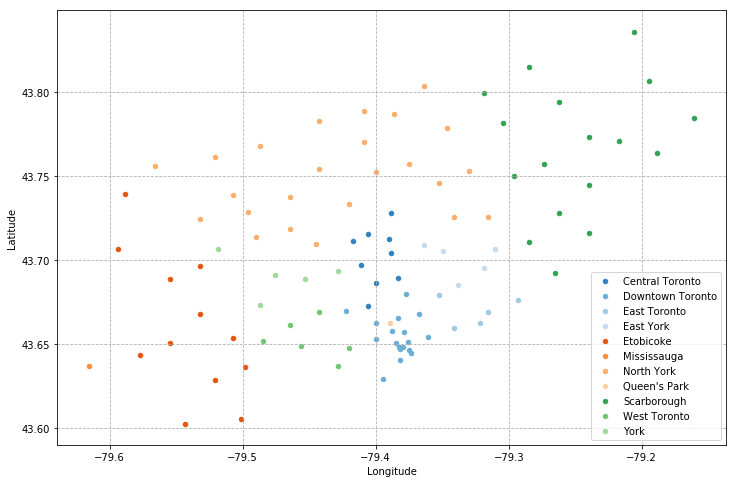

In [77]:
colors = postal_codes_geospatial.Borough.astype('category').cat.codes
fig, ax = plt.subplots()

grouped = postal_codes_geospatial.groupby('Borough')
colors = plt.get_cmap('tab20c').colors
for i, (key, group) in enumerate(grouped):
    group.plot(ax=ax, kind='scatter', x='Longitude', y='Latitude', label=key, color=colors[i])
    
# add grid
_ = plt.grid(linestyle='--')

In [130]:
from sklearn.preprocessing import scale
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, Birch, DBSCAN, KMeans, MeanShift, SpectralClustering
from sklearn.metrics import adjusted_rand_score

In [131]:
def cluster_and_display(clustering_model):
    cluster_col = 'cluster_' + clustering_model.__class__.__name__
    postal_codes_geospatial[cluster_col] = clustering_model.fit_predict(scale(postal_codes_geospatial[['Longitude', 'Latitude']]))
    
    fig, ax = plt.subplots()

    grouped = postal_codes_geospatial.groupby(cluster_col)
    colors = plt.get_cmap('tab20c').colors
    for i, (key, group) in enumerate(grouped):
        group.plot(ax=ax, kind='scatter', x='Longitude', y='Latitude', label=key, color=colors[i])

    # add grid
    plt.grid(linestyle='--')
    
    score = adjusted_rand_score(postal_codes_geospatial.Borough.values, postal_codes_geospatial[cluster_col].values)
    print('Similarity with original boroughs:', str(round(score * 100, 2)) + '%')

Similarity with original boroughs: 37.96%


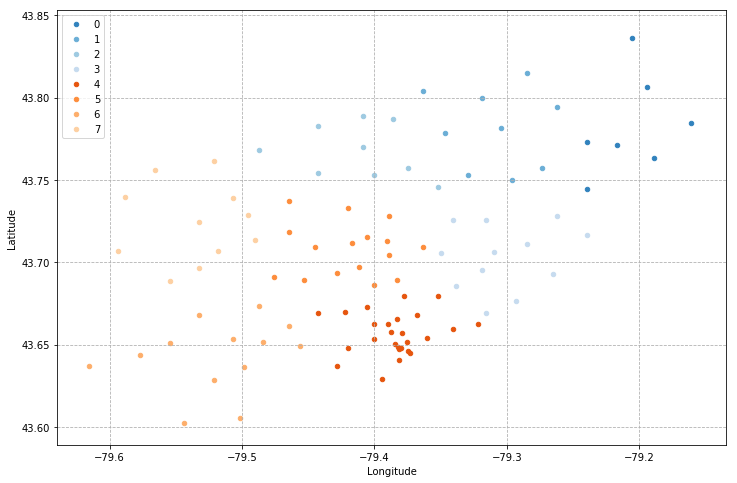

In [132]:
cluster_and_display(AffinityPropagation())

Similarity with original boroughs: 40.09%


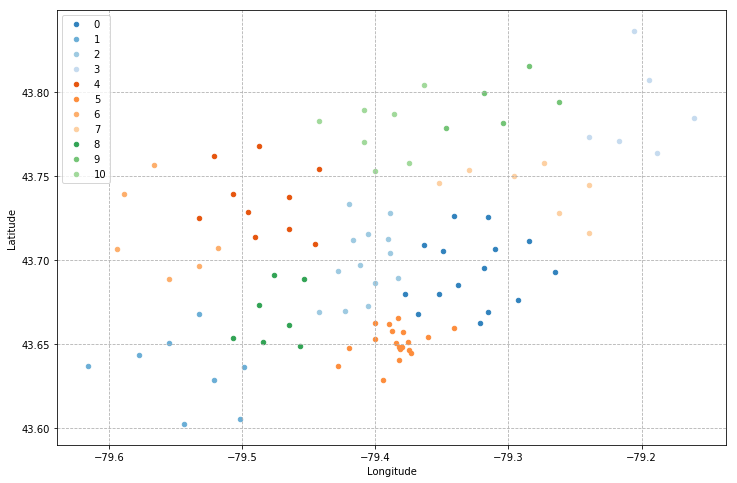

In [133]:
cluster_and_display(AgglomerativeClustering(11))

Similarity with original boroughs: 8.96%


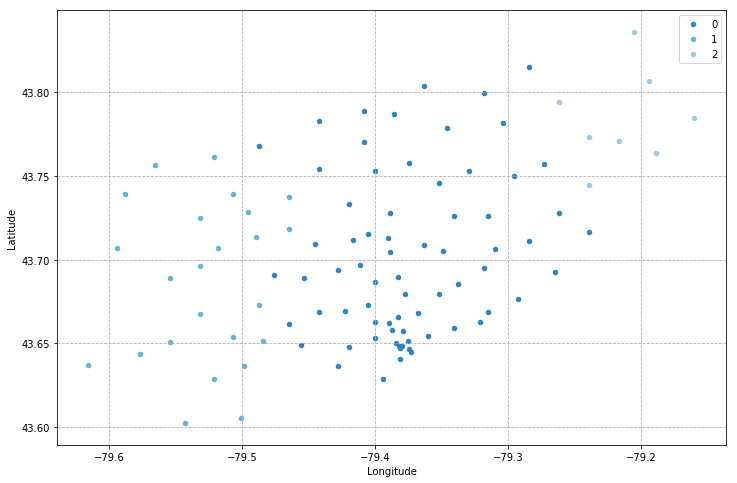

In [134]:
cluster_and_display(Birch())

Similarity with original boroughs: 3.41%


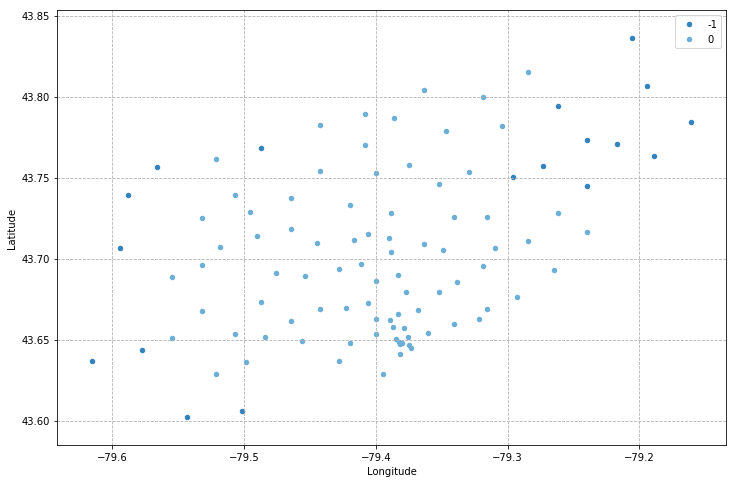

In [135]:
cluster_and_display(DBSCAN())

Similarity with original boroughs: 40.45%


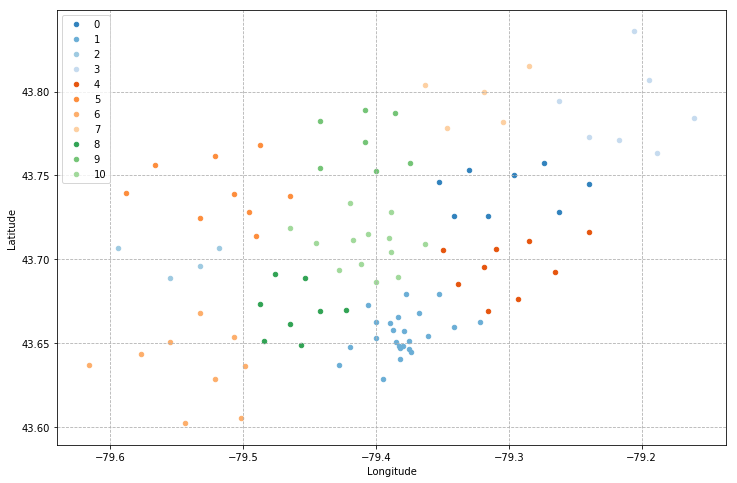

In [136]:
cluster_and_display(KMeans(11))

Similarity with original boroughs: 0.0%


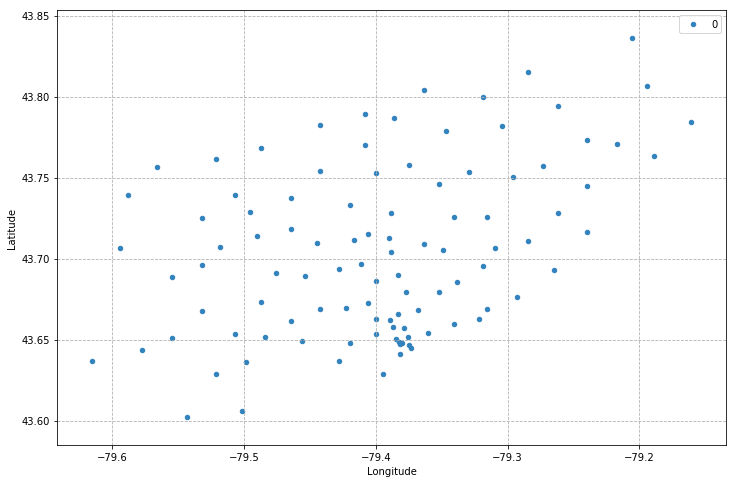

In [137]:
cluster_and_display(MeanShift())

Similarity with original boroughs: 27.99%


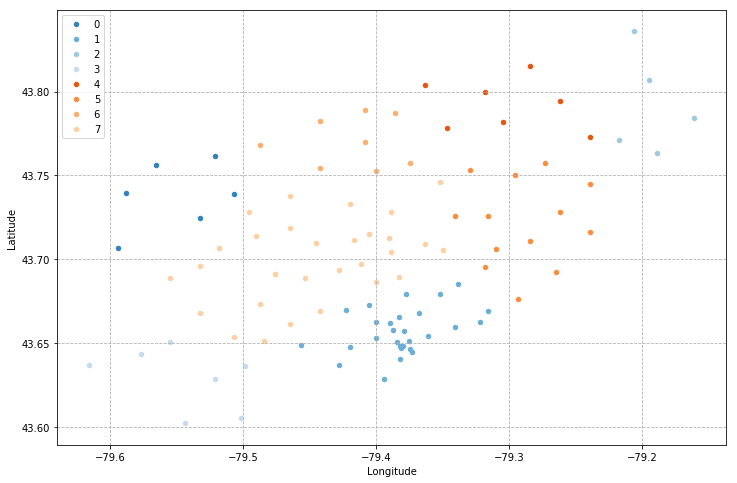

In [138]:
cluster_and_display(SpectralClustering())

### Conclusion

Looking above it seems that **Agglomerative Clustering** and **KMeans** (with prior knowledge about the data having 11 clusters) fare best.

Without prior knowledge, it can be seen that **Affinity Propagation** naturally extracts the clusters quite closely.